In [1]:
import pandas as pd

In [2]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv('UCI_Credit_Card.csv') #TODO

In [3]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [4]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)

In [5]:
print(df.info())
print(df.describe())
print(df['AGE'].mean())
print(df['AGE'].max())

import numpy as nmp
print(nmp.mean(df['AGE']))
print(nmp.max(df['AGE']))
print(nmp.median(df['AGE']))
print(nmp.percentile(df['AGE'],50))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [6]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

#TODO 8656

len(df[(df['SEX'] == 2) & (df['EDUCATION'] == 2)].index)

8656

In [7]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO
df_med=pd.DataFrame(df['default.payment.next.month'].unique(), columns=['default.payment.next.month'])

for i in df.columns:
    if i.startswith('BILL_') or i.startswith('PAY_'):
        col_list.append(i)
        df_x=pd.DataFrame(df[[i,'default.payment.next.month']].groupby('default.payment.next.month', as_index=False).median())
        df_med=pd.merge(
                        df_med,
                        df_x,
                        left_on='default.payment.next.month',
                        right_on='default.payment.next.month'
                        )
df_med.set_index('default.payment.next.month').T

NameError: name 'col_list' is not defined

In [8]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

#TODO
df.pivot_table('ID', ['SEX', 'EDUCATION'], 'MARRIAGE', 'count') 

MARRIAGE          0       1       2     3
SEX EDUCATION                            
1   0           NaN     2.0     6.0   NaN
    1           1.0  1690.0  2633.0  30.0
    2           1.0  2370.0  2940.0  63.0
    3          12.0  1048.0   894.0  36.0
    4           NaN    18.0    23.0   1.0
    5           NaN    48.0    46.0   1.0
    6           NaN    14.0    11.0   NaN
2   0           NaN     2.0     4.0   NaN
    1           3.0  2032.0  4176.0  20.0
    2           5.0  4472.0  4080.0  99.0
    3          32.0  1813.0  1015.0  67.0
    4           NaN    34.0    45.0   2.0
    5           NaN   102.0    81.0   2.0
    6           NaN    14.0    10.0   2.0

In [9]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO
def limit_bal_map (s):
    if s <= 10000:
        return 'A'
    elif s <=100000 and s >10000:
        return 'B'
    elif s <=200000 and s >100000:
        return 'C'
    elif s <=400000 and s >200000:
        return 'D'
    elif s <=700000 and s >400000:
        return 'E'
    elif s >700000:
        return 'F'

df['lim_bal_type']=df['LIMIT_BAL'].map(lambda s: limit_bal_map(s))
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,lim_bal_type
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,B
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,C
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,B
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,B
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,B


In [10]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt # библиотека pyplot вложена в matplotlib
import seaborn as sns

In [11]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

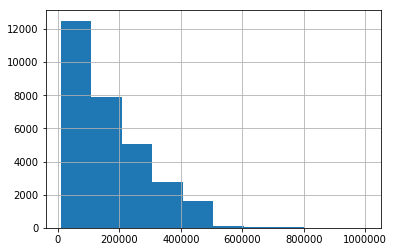

In [12]:
df['LIMIT_BAL'].hist()

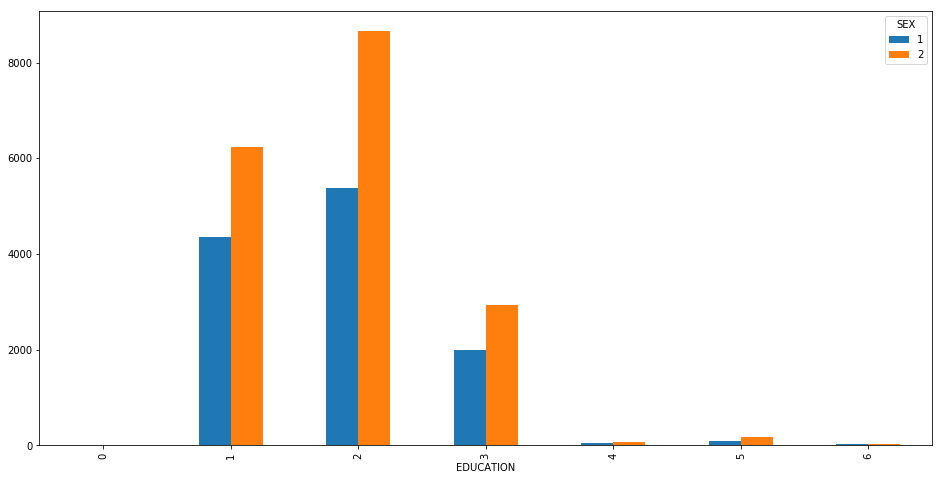

In [13]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)
fig, ax = plt.subplots(figsize=(16,8))
df.pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX', 'count').plot(kind='bar', stacked=False, ax=ax)

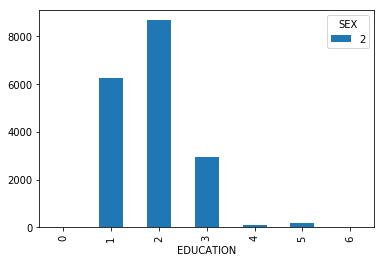

In [14]:

df[df['SEX'] == 2].pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX', 'count').plot(kind='bar', stacked=False)

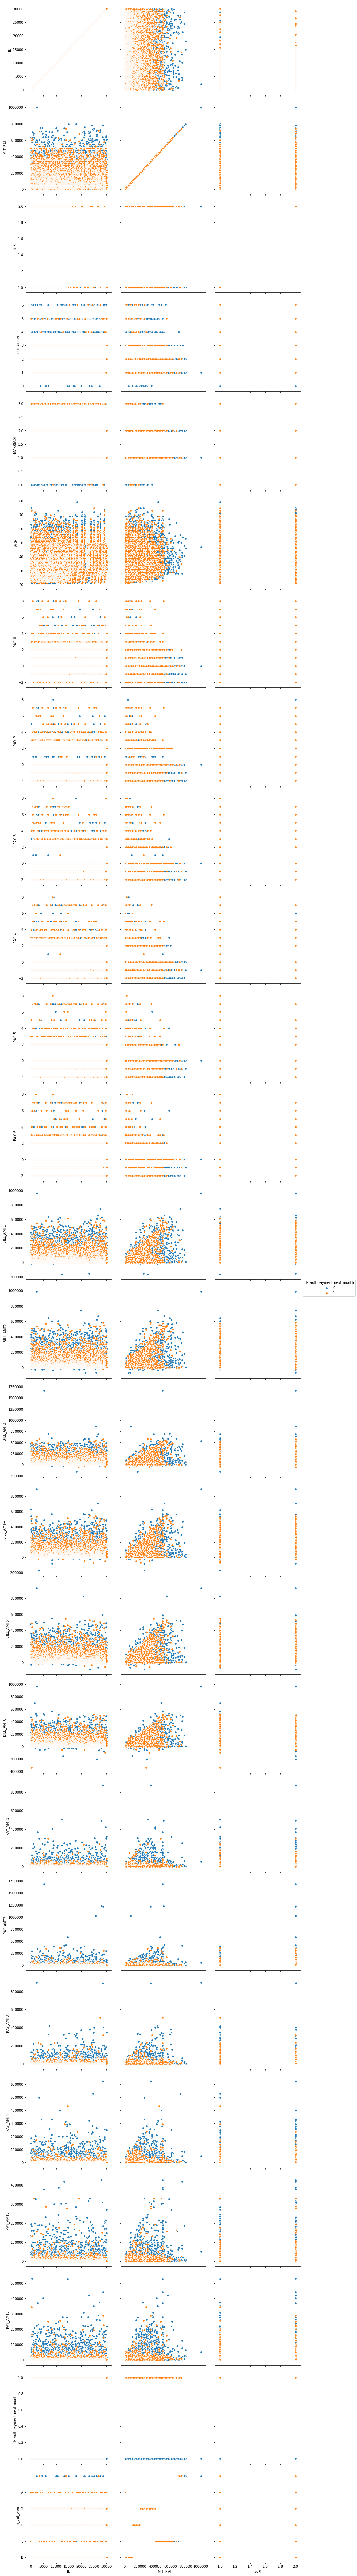

In [15]:

import seaborn as sns

sns.pairplot(df, size=4, x_vars=df.columns[0:3], y_vars=df.columns, hue='default.payment.next.month')